In [1]:
import pickle
import pandas as pd
from utils.read2df import read2df
from params import *

PERIOD = 900

In [2]:
with open('result/cointncorr.pickle', 'rb') as pk:
    data = pickle.load(pk)
    
dfs = read2df(symbols=data[0], freqs={data[1]: freqs[data[1]]})
df0 = dfs[0][dfs[0]['tic']==data[0][0]].reset_index(drop=True)
df1 = dfs[0][dfs[0]['tic']==data[0][1]].reset_index(drop=True)

In [3]:
df0 = df0[['time', 'close', 'tic', 'itvl', 'datetime']]
df1 = df1[['time', 'close', 'tic', 'itvl', 'datetime']]

tic0, tic1 = df0['tic'][0], df1['tic'][0]
df = pd.merge(df0, df1, on=['time', 'itvl', 'datetime'], suffixes=(f"_{tic0}", f"_{tic1}"))
df = df.drop([f"tic_{tic0}", f"tic_{tic1}"], axis=1)
df['spread'] = df[f'close_{tic0}'] - df[f'close_{tic1}']

In [5]:
zscore = []

for index, row in df.iterrows():
    if index <= PERIOD:
        zscore.append(0)
    else:
        df_tmp = df.iloc[index-PERIOD:index]
        zscore.append((row['spread']-df_tmp['spread'].mean())/df_tmp['spread'].std())

df['zscore'] = zscore

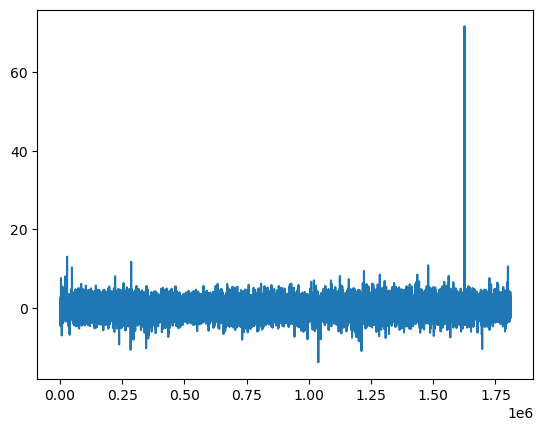

In [10]:
import matplotlib.pyplot as plt

plt.plot(df.zscore)